<a href="https://colab.research.google.com/github/knolasco/Coffee-Classification-by-Cupper-Ratings/blob/main/Coffee_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd # for reading data

import matplotlib.pyplot as plt # for visualizing data
import seaborn as sns

from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler # scaling the data
from sklearn.model_selection import cross_val_score

In [76]:
# let's read the data
file_path = 'https://github.com/knolasco/Data-Science-Projects/raw/master/Coffee%20Classification%20by%20Ratings/Coffee-modified%20(1).csv'
coffee_data = pd.read_csv(file_path)
print(coffee_data.shape)

# let's grab the numeric data
numeric = [col for col in coffee_data.columns
           if coffee_data[col].dtypes == 'float64']

# let's drop any na's in the numeric data
coffee_data.dropna(subset = numeric, inplace = True)
print(coffee_data.shape)

# I want to change the types for the following columns into floats
col_to_change = ['Aroma','Flavor','Aftertaste','Acidity']

for col in col_to_change:
  coffee_data[col] = coffee_data[col].astype('float64')

print(coffee_data.dtypes)

(1319, 44)
(1081, 44)
ID                        object
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags            object
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points        

In [96]:
# I want to try to predict processing.method
# let's see what methods we have
coffee_data.groupby('Processing.Method')['Processing.Method'].count()

# let's drop na's
coffee_data.dropna(subset = ['Processing.Method'], inplace = True)

# I want to use one-hot encoding for this column, since it is categorical
dummies = pd.get_dummies(coffee_data['Processing.Method'])

In [80]:
# let's split the data into train and valid
# first we grab the numeric columns and that will be X
numeric = [col for col in coffee_data.columns
           if coffee_data[col].dtypes == 'float64']

# I don't want to use category.2.defects, or anything about the altitude
to_remove = ['Category.Two.Defects','altitude_low_meters','altitude_high_meters','altitude_mean_meters']
for col in to_remove:
  numeric.remove(col)

# separate the features and predictors
X = coffee_data[numeric]
Y = coffee_data['Processing.Method']

x_train, x_valid, y_train, y_valid = train_test_split(X,Y, train_size = 0.75, random_state = 0)

# scale the data
scaler = StandardScaler()
scaler.fit(x_train)

x_train = pd.DataFrame(scaler.transform(x_train))
x_valid = pd.DataFrame(scaler.transform(x_valid))

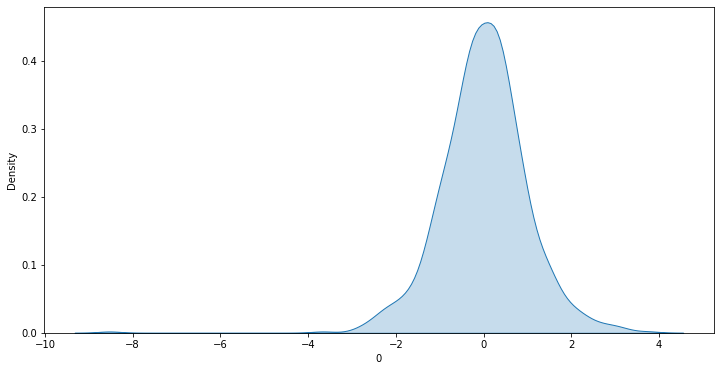

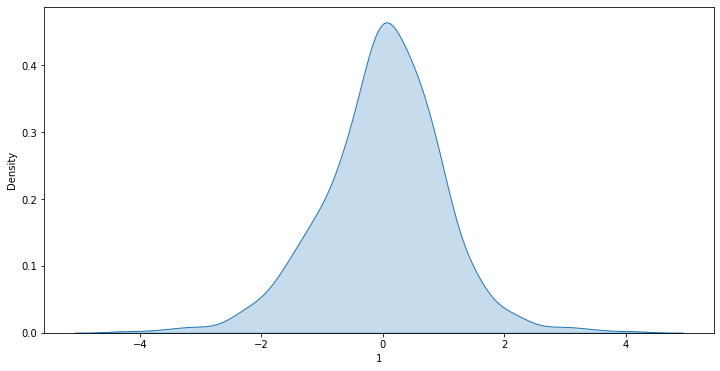

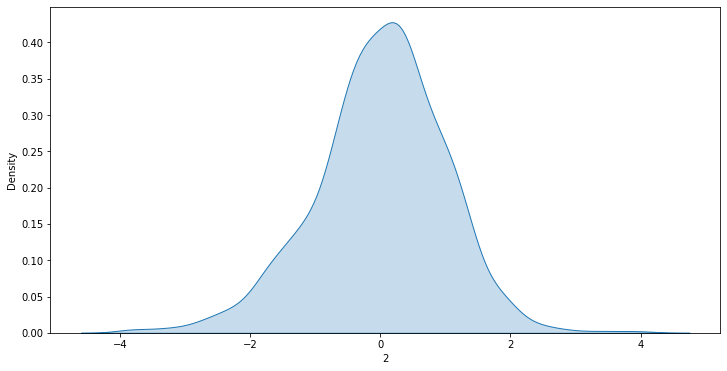

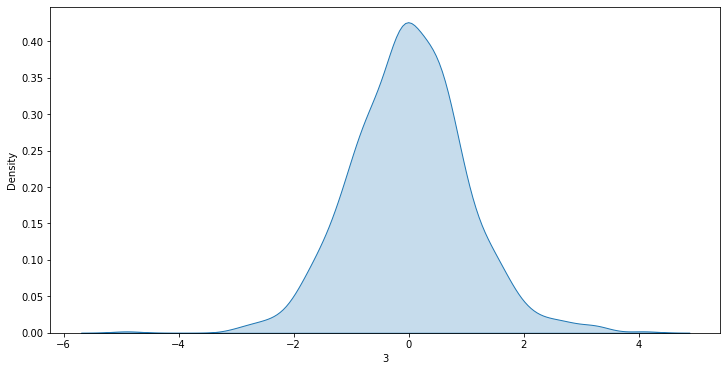

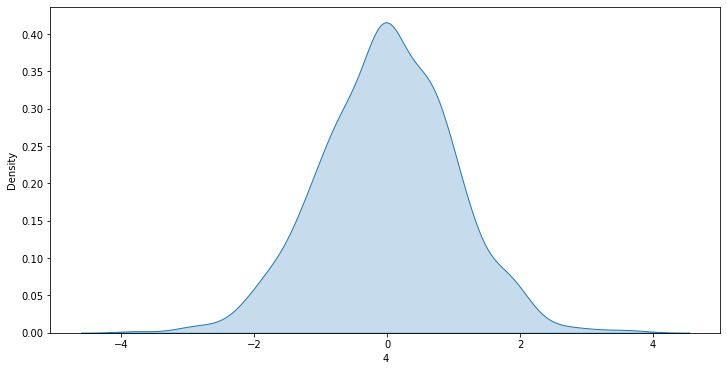

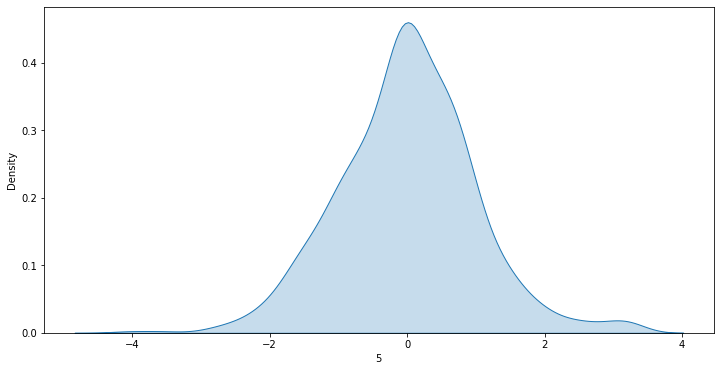

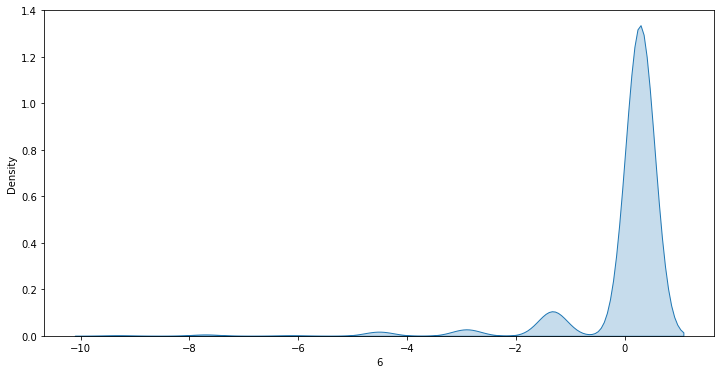

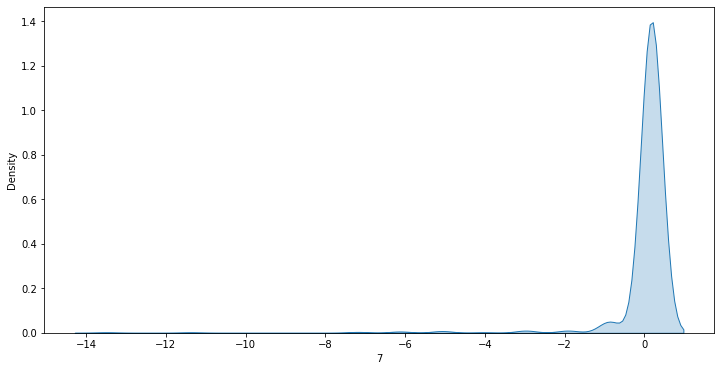

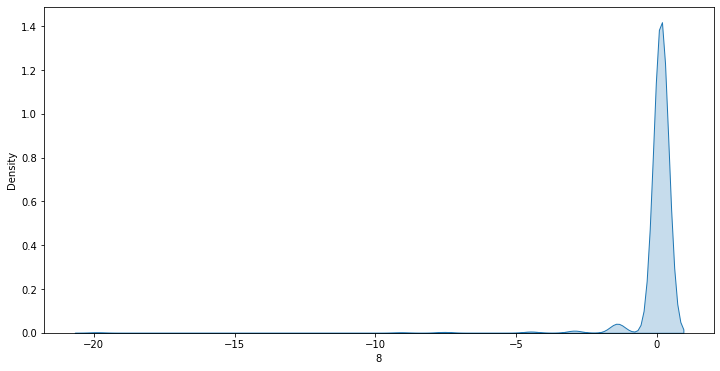

In [97]:
# let's visualize the data
for col in x_train.columns:
  plt.figure(figsize = (12,6))
  sns.kdeplot(x = x_train[col], shade = True)

# all of the data is uniformly distributed

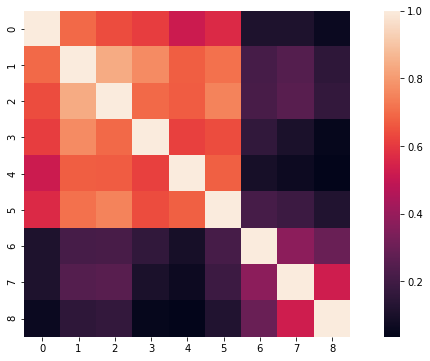

In [98]:
# let's see the correlations by a heatmap
corr = x_train.corr()
plt.figure(figsize = (12,6))
sns.heatmap(data = corr, square = True)

# some columns are highly correlated

In [99]:
# let's build our first model: Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
predictions = logistic_model.predict(x_valid)

# let's see how the model performed
print('---------------------------------------------------------------------------------')
print('The accuracy of Logistic Regression is: {:.2f}%'.format(accuracy_score(y_valid, predictions)))
print('---------------------------------------------------------------------------------')

#10 fold cross-validation
# print(cross_val_score(logistic_model,y_valid, predictions, cv = 10))
print('---------------------------Confusion Matrix--------------------------------------')

print(pd.crosstab(y_valid, predictions, margins=True))
print('---------------------------------------------------------------------------------')


---------------------------------------------------------------------------------
The accuracy of Logistic Regression is: 0.71%
---------------------------------------------------------------------------------
---------------------------Confusion Matrix--------------------------------------
col_0                      Natural / Dry  Washed / Wet  All
Processing.Method                                          
Natural / Dry                          3            42   45
Other                                  0             6    6
Pulped natural / honey                 1             2    3
Semi-washed / Semi-pulped              0            16   16
Washed / Wet                           5           176  181
All                                    9           242  251
---------------------------------------------------------------------------------
